# Predicting Batter Salary Using Regression Model
---
*By Ihza Gonzales*

Using the historical batter stats and salary, a regression model will be created to predict the salary. 

## Import Libraries
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import AdaBoostRegressor, VotingRegressor

import pickle

## Import Dataset
---

In [2]:
df = pd.read_csv('../data/past_salaries_bat.csv').drop(['Unnamed: 0'], axis = 1)
df.head()

,playerID,yearID,teamID_x,lgID_x,G,AB,R,H,2B,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS,salary
0,aguaylu01,1986,PHI,NL,62,133,17,28,6,1,4,13.0,8,26.0,0.211,0.267,0.361,0.628,275000
1,aguilri01,1986,NYN,NL,32,51,4,8,0,0,2,6.0,3,12.0,0.157,0.204,0.275,0.479,130000
2,aldremi01,1986,SFN,NL,84,216,27,54,18,3,2,25.0,33,34.0,0.250,0.353,0.389,0.742,60000
3,allanan01,1986,CLE,AL,101,293,30,66,7,3,1,29.0,14,36.0,0.225,0.260,0.280,0.540,60000
4,almonbi01,1986,PIT,NL,102,196,29,43,7,2,7,27.0,30,38.0,0.219,0.319,0.383,0.702,260000


In [3]:
df.shape

(14276, 19)

## Create X and y Variables for Salary
---

In [4]:
X = df.drop(columns = ['playerID', 'salary', 'teamID_x', 'lgID_x', 'yearID', 'G'])
y = df['salary']
X.head()

,AB,R,H,2B,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS
0,133,17,28,6,1,4,13.0,8,26.0,0.211,0.267,0.361,0.628
1,51,4,8,0,0,2,6.0,3,12.0,0.157,0.204,0.275,0.479
2,216,27,54,18,3,2,25.0,33,34.0,0.250,0.353,0.389,0.742
3,293,30,66,7,3,1,29.0,14,36.0,0.225,0.260,0.280,0.540
4,196,29,43,7,2,7,27.0,30,38.0,0.219,0.319,0.383,0.702


## Train Test Split
---

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=42)

## Preprocessing
---
### Standard Scaler

In [6]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### PCA

In [7]:
pca = PCA(random_state=42)
X_train_p = pca.fit_transform(X_train_sc)
X_test_p = pca.transform(X_test_sc)

## Functions Implemented
---

In [8]:
def fit_models(x, y, x_test, y_test, model):
    """
    Function fits specified model
    Returns metrics for Train and Test Set
    """
    model.fit(x, y)
    
    print()
    print(f'Train')
    reg_metrics(x, y, model)
    
    print()
    print(f'Test')
    reg_metrics(x_test, y_test, model)

In [9]:
def reg_metrics(x, y, model):
    """
    Function predicts using a specified model.
    Returns MSE, RMSE, and R2
    """
    
    y_pred = model.predict(x)
    resids = y - y_pred

    mse = metrics.mean_squared_error(y, y_pred)
    rmse = metrics.mean_squared_error(y, y_pred, squared = False)
    score = model.score(x, y)
    
    print(model)
    print("R2: ", score)
    print("MSE: ", mse)
    print("RMSE: ", rmse)

## Voting Model
---

In [10]:
l_alphas = np.logspace(-3, 1, 100)
e_alphas = np.linspace(0.01, 1, 100)
enet_ratio = 0.05
r_alphas = np.logspace(0, 5, 220)

In [11]:
vote = VotingRegressor([
    ('ad', AdaBoostRegressor(random_state=42)),
    ('rid', RidgeCV(r_alphas, scoring='r2', cv=5)),
    ('las', LassoCV(alphas=l_alphas, cv=5, max_iter=50_000, n_jobs=-1)),
    ('enet_model', ElasticNetCV(alphas=e_alphas, l1_ratio=enet_ratio, cv=5, max_iter=3000, n_jobs=-1))
])

In [12]:
fit_models(X_train_p, y_train, X_test_p, y_test, vote)


Train
VotingRegressor(estimators=[('ad', AdaBoostRegressor(random_state=42)),
                            ('rid',
                             RidgeCV(alphas=array([1.00000000e+00, 1.05397680e+00, 1.11086709e+00, 1.17082814e+00,
       1.23402569e+00, 1.30063444e+00, 1.37083853e+00, 1.44483200e+00,
       1.52281940e+00, 1.60501632e+00, 1.69164996e+00, 1.78295980e+00,
       1.87919826e+00, 1.98063137e+00, 2.08753951e+00, 2.20021820e+00,
       2.31897894e...
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                                          cv=5, l1_ratio=0.05, max_iter=3000,
    

## Save Model to Pickle File
---

In [13]:
with open('../model/salary_model_b.pkl', 'wb') as pickle_out:
    pickle_out = pickle.dump(vote, pickle_out)

## Use Forecasted Stats from Time Series to Predict Salary
---
*This will be used for app*

In [14]:
df = pd.read_csv('../data/player_forecasts_bat.csv').drop(['Unnamed: 0'], axis = 1)
df.head()

,name,AB,R,H,2B,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS
0,Jose Abreu,300.0,73.0,75.0,0.0,0.0,0.0,75.0,0.0,75.0,0.264,0.326,0.485,0.812
1,Willy Adames,197.0,0.0,65.0,0.0,0.0,0.0,1.0,0.0,65.0,0.240,0.303,0.391,0.694
2,Ehire Adrianza,113.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,53.0,0.233,0.300,0.363,0.663
3,Jesus Aguilar,210.0,0.0,70.0,0.0,0.0,0.0,70.0,0.0,70.0,0.261,0.341,0.464,0.805
4,Nick Ahmed,225.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,75.0,0.226,0.282,0.362,0.644


In [15]:
X = df.drop(columns = ['name'])

In [16]:
X = ss.transform(X)
X = pca.transform(X)

preds = vote.predict(X)

pred_df = pd.DataFrame(preds, columns = ['salary'], index = df['name'])

### Save to CSV and Pickle Files

In [17]:
pred_df.to_csv('../data/pred_salary_bat.csv')

In [18]:
with open('../pickles/pred_salary_bat.pkl', 'wb') as pickle_out:
    pickle_out = pickle.dump(pred_df, pickle_out)

## EDA of Results
---
Predict on Current Player Stats and compare predicted stats vs actual stats

In [19]:
df = pd.read_csv('../data/mlb_players_bat.csv').drop(['Unnamed: 0'], axis = 1)
df.head()

,MLBID,FIRSTNAME,LASTNAME,Player,Team,Pos,Age,G,AB,R,...,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS,salary
0,547989,Jose,Abreu,Jose Abreu,CWS,1B,34,152,566,86,...,2,30,117,61,143,0.261,0.351,0.481,0.832,"$17,666,666"
1,642715,Willy,Adames,Willy Adames,TB,SS,26,41,132,16,...,1,5,15,10,51,0.197,0.254,0.371,0.625,"$590,000"
2,501303,Ehire,Adrianza,Ehire Adrianza,ATL,SS,32,109,182,32,...,2,5,28,21,42,0.247,0.327,0.401,0.728,"$1,500,000"
3,542583,Jesus,Aguilar,Jesus Aguilar,MIA,1B,31,131,449,49,...,0,22,93,46,93,0.261,0.329,0.459,0.788,"$4,500,000"
4,605113,Nick,Ahmed,Nick Ahmed,ARI,SS,31,129,434,46,...,3,5,38,34,104,0.221,0.280,0.339,0.619,"$8,125,000"


In [20]:
X = df.drop(columns = ['MLBID', 'FIRSTNAME', 'LASTNAME', 'Player', 'Team', 'Pos', 'Age', 'G', 'salary'])
X.head()

,AB,R,H,2B,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS
0,566,86,148,30,2,30,117,61,143,0.261,0.351,0.481,0.832
1,132,16,26,6,1,5,15,10,51,0.197,0.254,0.371,0.625
2,182,32,45,9,2,5,28,21,42,0.247,0.327,0.401,0.728
3,449,49,117,23,0,22,93,46,93,0.261,0.329,0.459,0.788
4,434,46,96,30,3,5,38,34,104,0.221,0.280,0.339,0.619


In [21]:
X = ss.transform(X)
X = pca.transform(X)

In [22]:
# Convert salary from object to int
df['salary'] = df['salary'].str.replace(',', '').str.replace('$', '').astype(int)

#Copied from https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

<ipython-input-22-3820715aeb76>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace(',', '').str.replace('$', '').astype(int)


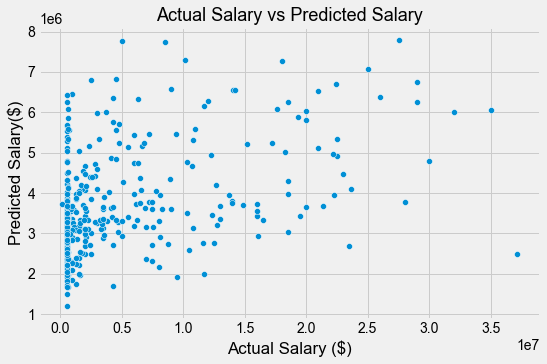

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df['salary'], y = vote.predict(X))

sns.set(font_scale=1.5)
plt.xlabel('Actual Salary ($)')
plt.ylabel('Predicted Salary($)')
plt.title('Actual Salary vs Predicted Salary');

If the predicted salary was close to actual salary the points would look like a linear shape. When looking at this there is not linear shape. There is a cluster towards the left hand side of the graph. This means that the predicted salary was much higher than the actual salary. My thought on this is due to the fact that many good players who just started their careers still have a Rookie salary. Pete Alonso for instance is one of the best batters in the league but his salary is just above 500k.

## Recap
---
This notebook used hitorical stats and salary to predict the salary of batters. Using the model created, the salary was predicted on the forecasted stats of batters for use in the app.